In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [38]:
df=sns.load_dataset('diamonds')
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [39]:
df.shape

(53940, 10)

In [40]:
df.describe().T

count         mean          std    min     25%      50%      75%  \
carat  53940.0     0.797940     0.474011    0.2    0.40     0.70     1.04   
depth  53940.0    61.749405     1.432621   43.0   61.00    61.80    62.50   
table  53940.0    57.457184     2.234491   43.0   56.00    57.00    59.00   
price  53940.0  3932.799722  3989.439738  326.0  950.00  2401.00  5324.25   
x      53940.0     5.731157     1.121761    0.0    4.71     5.70     6.54   
y      53940.0     5.734526     1.142135    0.0    4.72     5.71     6.54   
z      53940.0     3.538734     0.705699    0.0    2.91     3.53     4.04   

            max  
carat      5.01  
depth     79.00  
table     95.00  
price  18823.00  
x         10.74  
y         58.90  
z         31.80

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [42]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [43]:
df.duplicated().sum()

np.int64(146)

In [44]:
df_duplicates=df[df.duplicated()]
df_duplicates.head(10)


carat        cut color clarity  depth  table  price     x     y     z
1005   0.79      Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1006   0.79      Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1007   0.79      Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1008   0.79      Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
2025   1.52       Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
2183   1.00       Fair     E     SI2   67.0   53.0   3136  6.19  6.13  4.13
2820   1.00       Fair     F     SI2   65.1   55.0   3265  6.26  6.23  4.07
3156   0.90  Very Good     I     VS2   58.4   62.0   3334  6.29  6.35  3.69
3704   1.00      Ideal     E     SI2   62.9   56.0   3450  6.32  6.30  3.97
3981   1.00       Fair     H     SI1   65.5   57.0   3511  6.26  6.21  4.08

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
df.shape

(53794, 10)

In [48]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

<Axes: xlabel='carat', ylabel='Count'>

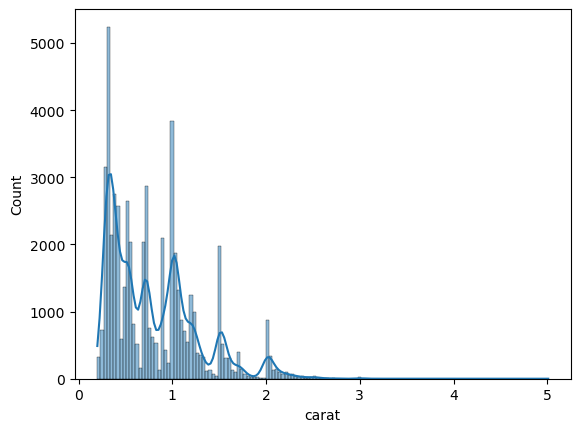

In [49]:
sns.histplot(df,x='carat',kde='1')

<Axes: xlabel='carat_scale', ylabel='Count'>

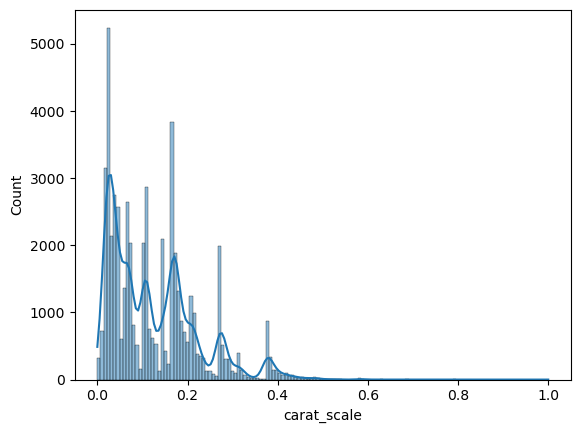

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['carat_scale']=scaler.fit_transform(df[['carat']])
df.head()
sns.histplot(df['carat_scale'],kde=1)

<Axes: xlabel='carat_stand', ylabel='Count'>

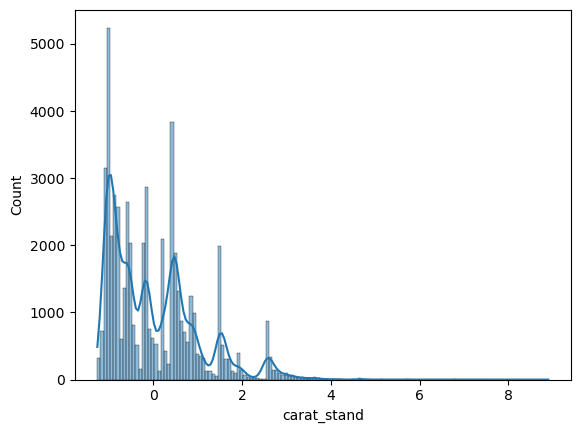

In [51]:
from sklearn.preprocessing import StandardScaler
scaler2=StandardScaler()
df['carat_stand']=scaler2.fit_transform(df[['carat']])
sns.histplot(df['carat_stand'],kde=1)

<Axes: xlabel='carat_log', ylabel='Count'>

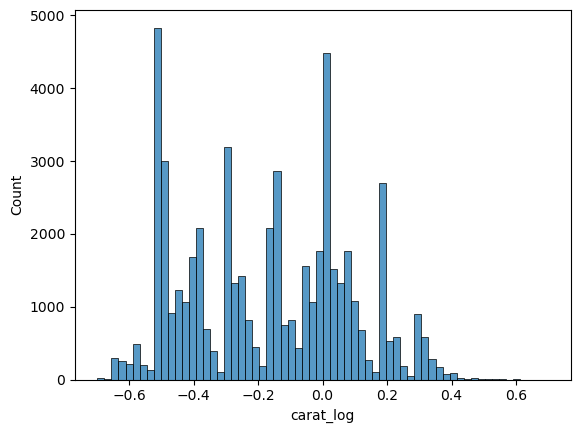

In [52]:
import numpy as np
df['carat_log']=np.log10(df['carat'])
sns.histplot(df['carat_log'])

<Axes: xlabel='carat_r', ylabel='Count'>

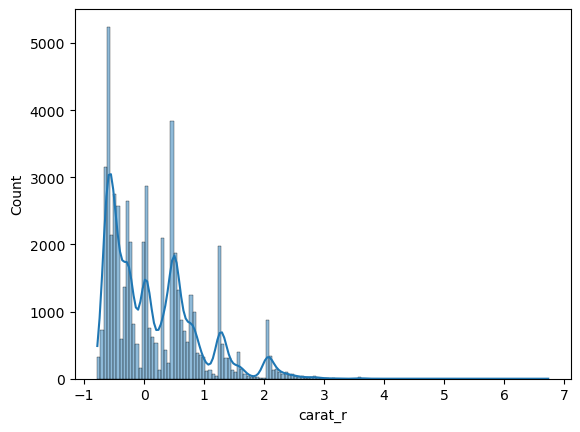

In [53]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
df['carat_r']=rs.fit_transform(df[['carat']])
sns.histplot(df['carat_r'],kde=1)

<Axes: xlabel='carat_t', ylabel='Count'>

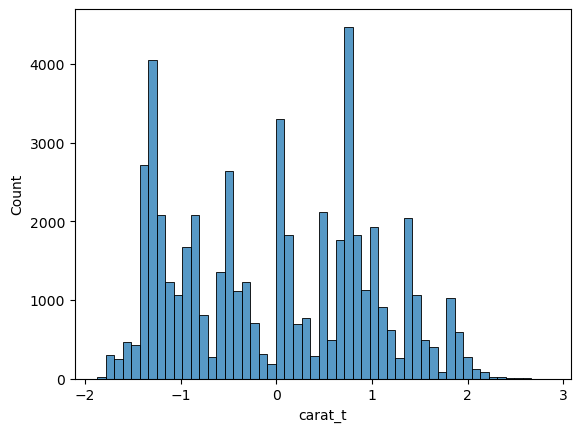

In [57]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # Use Box-Cox only if values > 0
carat_t = pt.fit_transform(df[['carat']])
df['carat_t']=pd.DataFrame(carat_t)
sns.histplot(df['carat_t'])


In [55]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   carat_scale  carat_stand  carat_log   carat_r   carat_t  
0     0.006237    -1.199402  -0.638272 -0.734375 -1.707297  
1     0.002079    -1.241651  -0.677781 -0.765625 -1.816341  
2     0.006237    -1.199402  -0.638272 -0.734375 -1.707297  
3     0.018711    -1.072656  -0.537602 -0.640625 -1.402856  
4     0.022869    -1.030407  -0.508638 -0.609375 -1.308316

In [56]:
carat_original = pt.inverse_transform(carat_t)
carat_original


c:\Users\Sami\miniconda3\envs\EDA\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PowerTransformer was fitted with feature names



array([[0.23],
       [0.21],
       [0.23],
       ...,
       [0.7 ],
       [0.86],
       [0.75]], shape=(53794, 1))

In [14]:
fig=px.box(df['carat'])
fig.show()

In [15]:
df.describe()

carat         depth         table         price             x  \
count  53794.00000  53794.000000  53794.000000  53794.000000  53794.000000   
mean       0.79778     61.748080     57.458109   3933.065082      5.731214   
std        0.47339      1.429909      2.233679   3988.114460      1.120695   
min        0.20000     43.000000     43.000000    326.000000      0.000000   
25%        0.40000     61.000000     56.000000    951.000000      4.710000   
50%        0.70000     61.800000     57.000000   2401.000000      5.700000   
75%        1.04000     62.500000     59.000000   5326.750000      6.540000   
max        5.01000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53794.000000  53794.000000  
mean       5.734653      3.538714  
std        1.141209      0.705037  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max       58.900000     31.800000

### Depth Column

<Axes: xlabel='depth', ylabel='Count'>

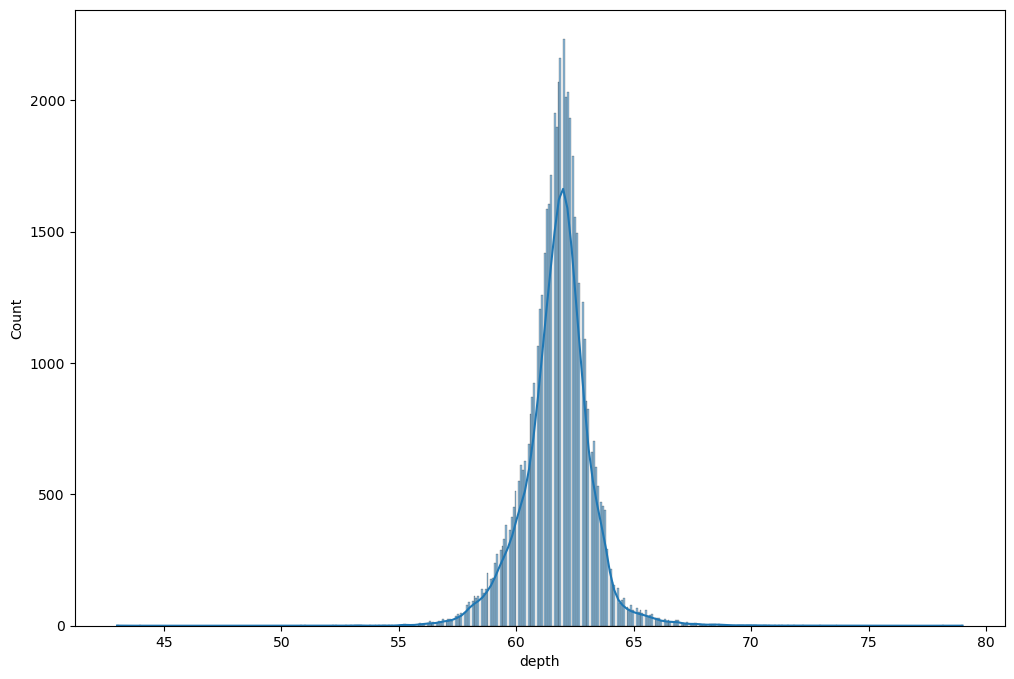

In [16]:
plt.figure(figsize=(12,8))
sns.histplot(df['depth'],kde=1)

In [17]:
fig2=px.box(df['depth'])
fig2.show()

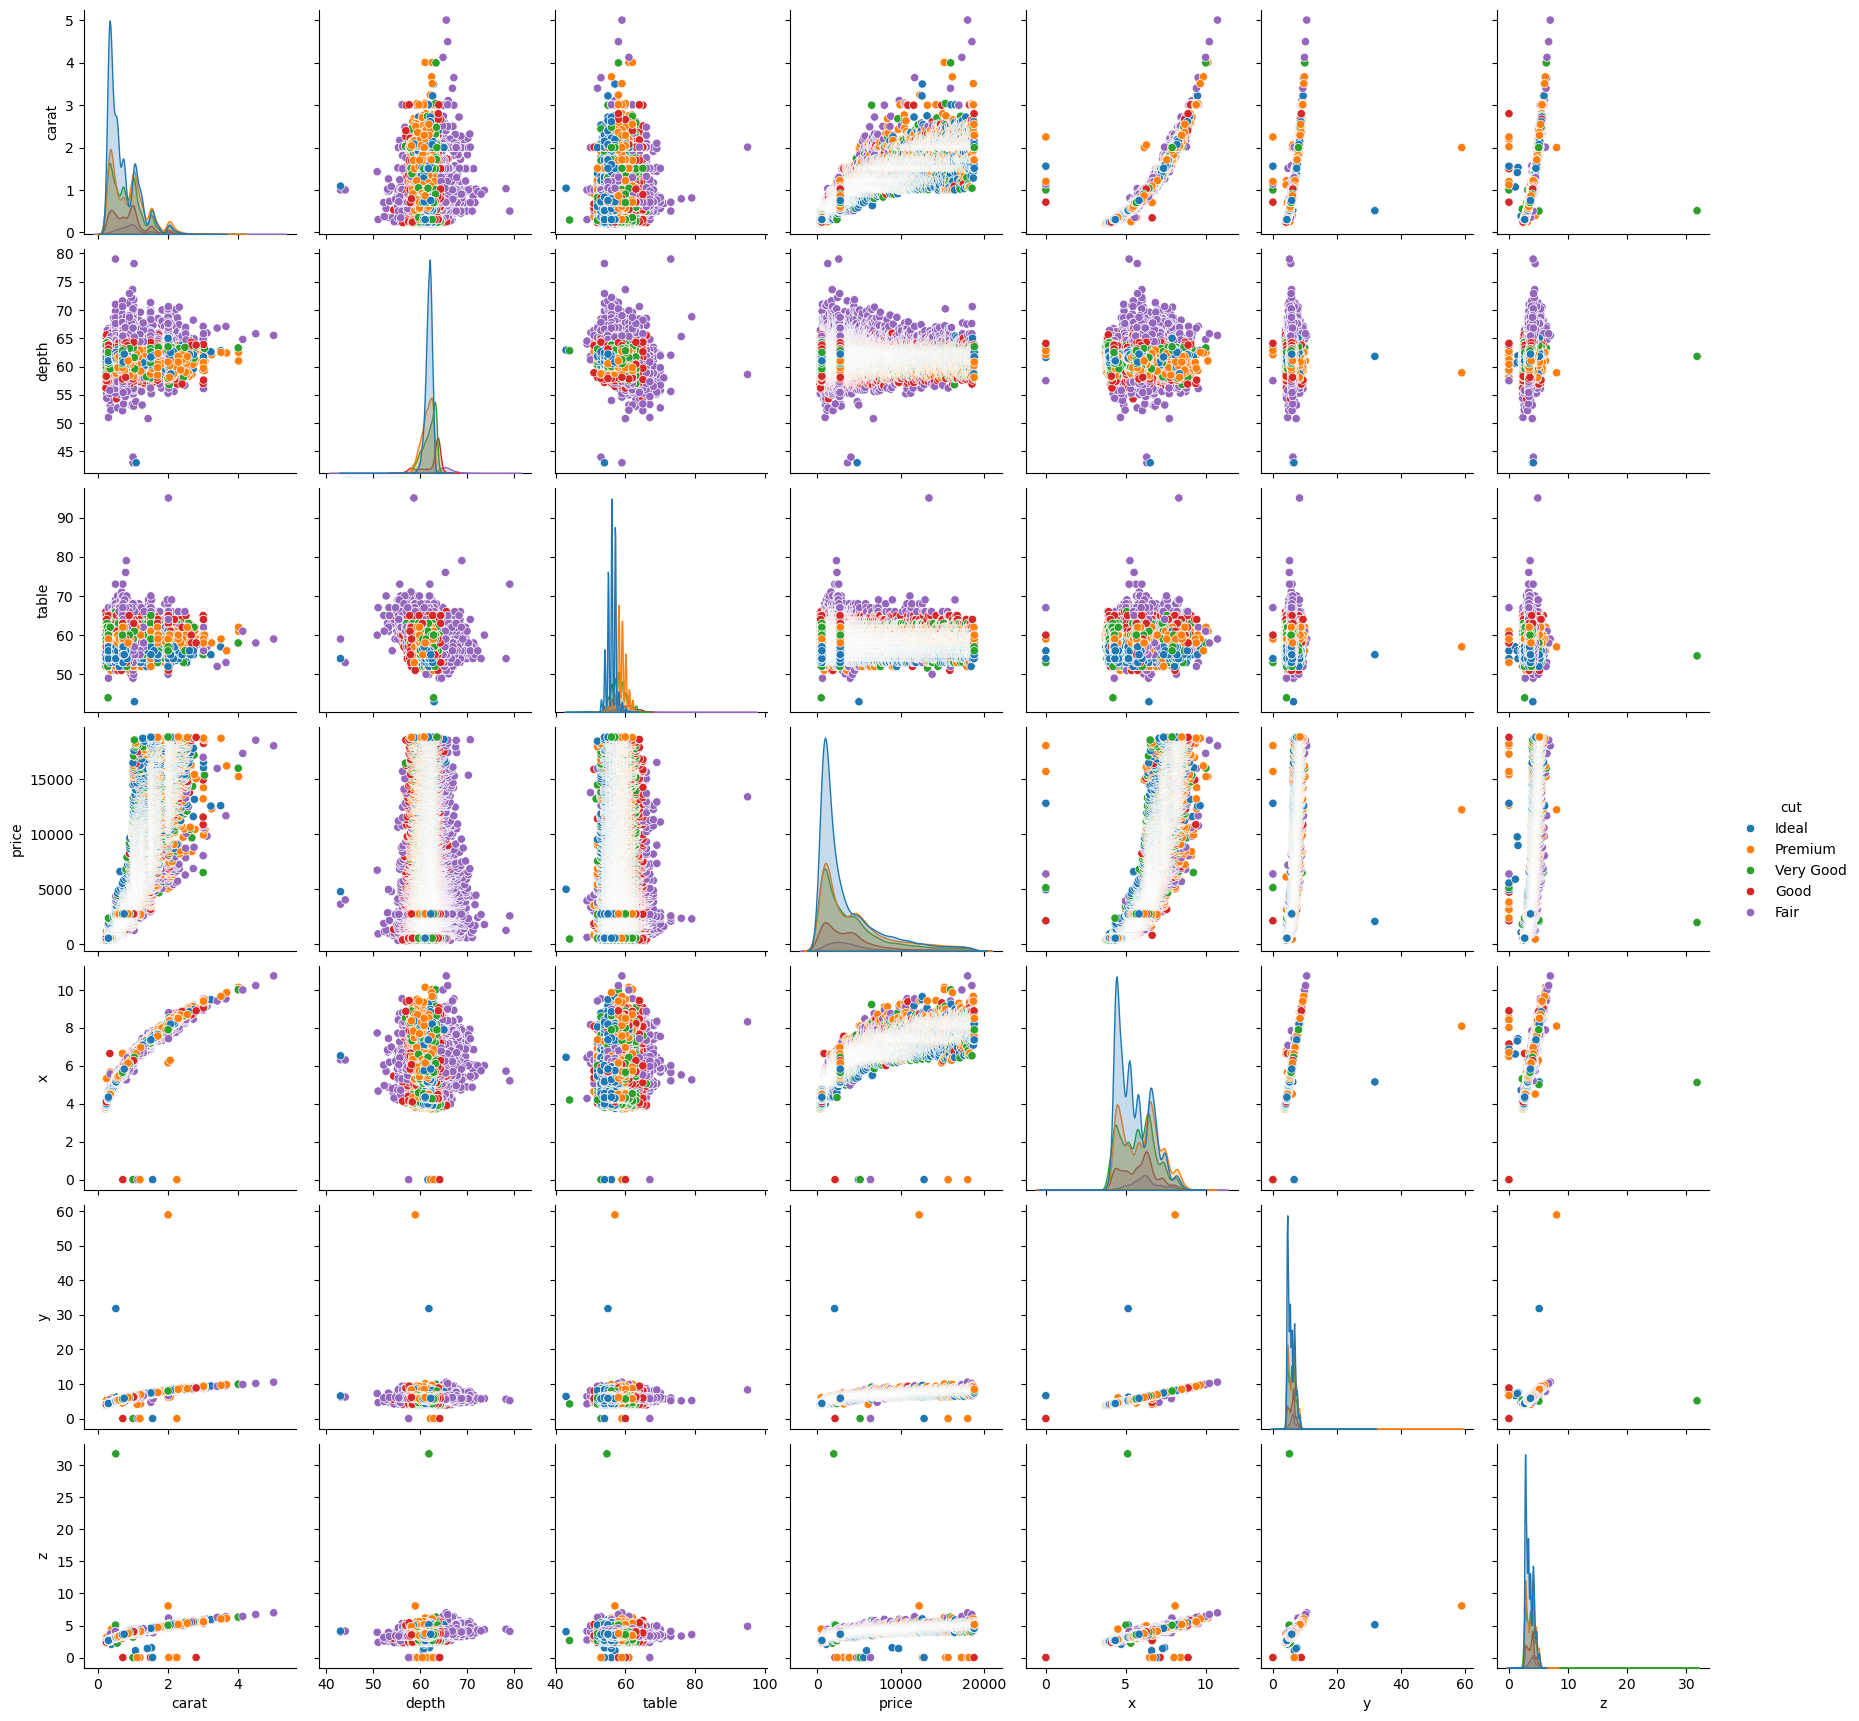

In [38]:
sns.pairplot(df,hue='cut')